## Pendulum in angular coordinates


In [94]:
import numpy as np
import model_q
from importlib import reload


In [99]:
reload(model_q)
params = model_q.Get_Params()

# params.g = 0
# params.b = 0
params.Kp = 100
params.Kd = 10

pen = model_q.SPend(params)
targ = model_q.targetman(params)
ctrl = model_q.Controller(params)
tf = 100
params.GTC = False

probes_num = model_q.Num_sim_pend(params, pen, targ, ctrl, tf)

Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Unseeded
Initial conditions: 
 q = 1.418537156836258 
 dq = 0.657890518123184
First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit


Scaling


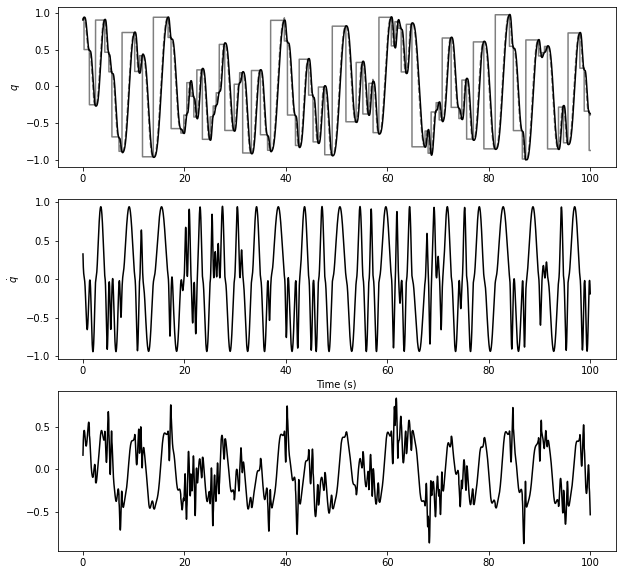

In [100]:
reload(model_q)
ind0 = 0
indf = -1
model_q.plot_states(params, probes_num, ind0, indf)

In [ ]:

# def get_sindy_model(train_data, u_train):
#     model = ps.SINDy()
#     model.fit(train_data, u=u_train, t=dt)
#     model.print()
#     return model
# model = ps.SINDy()
# model.fit(train_data, u=u_train, t=dt)
# model = get_sindy_model(train_data, u_train)
# model.print()

In [120]:
reload(model_q)
params.GTC = True
params.reach_slow = True

# Params for estimation
params.Zdim = 2
params.Udim = 1

params.theta_s = 0.01
params.qs = 4
params.theta_u = 0.01
params.qu = 4

params.recurr = False
params.debug = True
params.Lr = 1e-4

params.n_neurons = 1000
params.Xw = [np.zeros((1, params.n_neurons)), np.zeros((1, params.n_neurons))]

# Change seed
params.seed = 45
tf = 25
params.no_obs_from = tf - 5
probes_nengo = model_q.Nengo_sim(params, tf = tf)

Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Initial conditions: 
 q = 1.5362749782557716 
 dq = 0.19817890737890176
Time : 0.0
Theta_s: 0.01 Qs: 4
Ctrl,  0
Ground truth control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit


KeyboardInterrupt: 

Scaling
ind_O:  20000
cerr_hit_pos:  827
cerr_hit_vel:  666


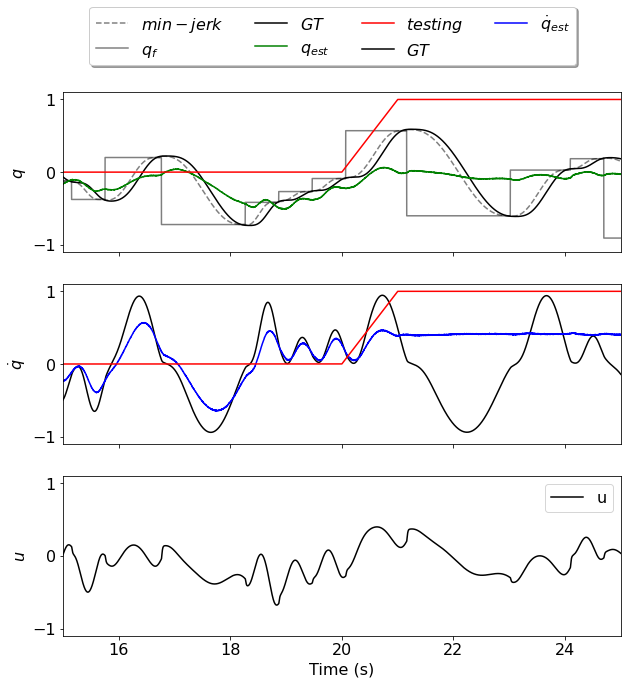

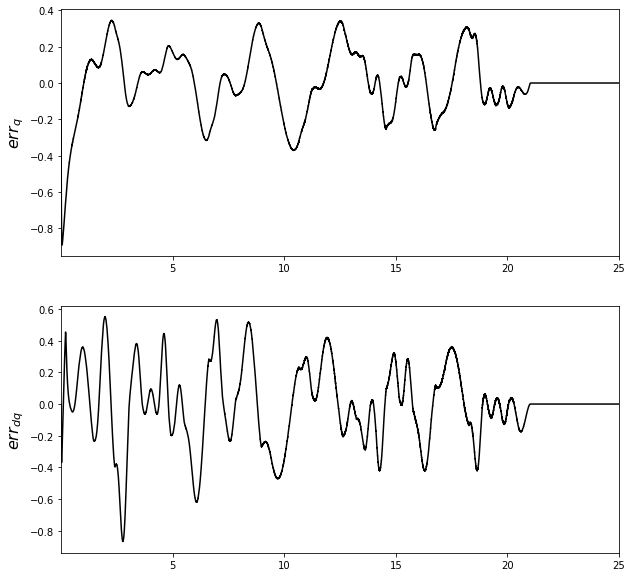

In [116]:
reload(model_q)

ind0 = -10
indf = -1
model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True)

# Save probes
# import pickle
# with open('probes_nengo.pkl', 'wb') as f:
#     pickle.dump(probes_nengo, f)

In [122]:
## Drive 5 times
reload(model_q)
import pickle 

seed_list = [45]

for i in range(len(seed_list)):
    params.GTC = True
    params.reach_slow = True

    # Params for estimation
    params.Zdim = 2
    params.Udim = 1

    params.theta_s = 0.01
    params.qs = 4
    params.theta_u = 0.01
    params.qu = 4

    params.recurr = False
    params.debug = True
    params.Lr = 1e-4

    params.n_neurons = 1000
    params.Xw = [np.zeros((1, params.n_neurons)), np.zeros((1, params.n_neurons))]

    # Change seed
    params.seed = 45
    tf = 25
    params.no_obs_from = tf - 5
    probes_nengo = model_q.Nengo_sim(params, tf = tf)

    # save probes
    fname = 'data_saves\\probes_nengo_GTC_' + str(seed_list[i]) + '.pkl'
    with open(fname, 'wb') as f:
        pickle.dump(probes_nengo, f)
    


Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Initial conditions: 
 q = 1.5362749782557716 
 dq = 0.19817890737890176
Time : 0.0
Theta_s: 0.01 Qs: 4
Ctrl,  0
Ground truth control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 25.0


In [ ]:
# save_dir = "C:\\Users\\Nat\\Documents\\Code\\Thesis\\pend\\data_saves\\"

# import dill as pickle
# # Saving the objects:
# with open(save_dir + 's1.pkl', 'wb') as f:  
#     pickle.dump([params, probes_nengo], f)

# # Getting back the objects:
# with open(save_dir + 's1.pkl', 'rb') as f:
#     params, probes_nengo = pickle.load(f)

In [ ]:
params.Kp, params.Kd

(100, 10)

In [ ]:
reload(model_q)

<module 'model_q' from 'c:\\Users\\Nat\\Documents\\Code\\Thesis\\pend\\model_q.py'>

(500000, 3)
Scaling
ind_O:  495000
cerr_hit_pos:  850
cerr_hit_vel:  351


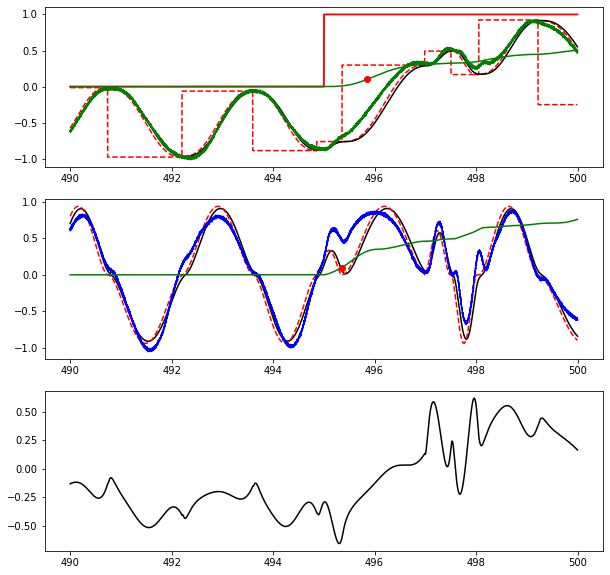

In [ ]:
model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True, True)

In [ ]:
def save_model(params, probes_nengo, tag =[]):
    save_name = f"pend_tf{params.tf}_s{params.theta_s}_qs{params.qs}_u{params.theta_u}_qu{params.qu}_recurr{params.recurr}_GTC{params.GTC}_n{params.n_neurons}_{tag}"
    with open(params.save_dir + save_name + '.pkl', 'wb') as f:
        pickle.dump([params, probes_nengo], f)
    print(f"Saved as {save_name}")

def load_model(save_name):
    with open(save_name, 'rb') as f:
        params, probes_nengo = pickle.load(f)
    return params, probes_nengo


In [ ]:

reload(model_q)
params = model_q.Get_Params()
params.debug = False



params.theta_s = 0.25
params.qs = 5
params.theta_u = 0.25
params.qu = 5
params.recurr = False



params.tf = 500
params.no_obs_from = params.tf -5
probes_nengo = model_q.Nengo_sim(params, GTC=True, tf = params.tf)

Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Ground truth control
Theta_s: 0.25 Qs: 5
0
1
Theta_u: 0.25 Qu: 5
U into adapt, 0


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over


Scaling
ind_O:  495000
cerr_hit_pos:  3262
cerr_hit_vel:  1766


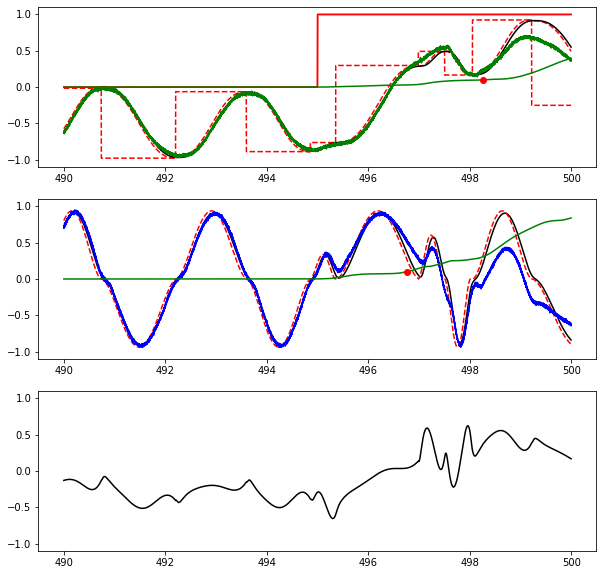

In [ ]:
params.debug = False

model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True, True)

In [ ]:
save_model(params, probes_nengo)

Saved as pend_tf5_s0.01_qs4_u0.01_qu4_recurrFalse_GTCFalse_n1000


Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Theta_s: 0.25 Qs: 5
0
Recurrent
1
Recurrent
Theta_u: 0.25 Qu: 5
U into adapt, 0
Estimated control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Scaling
ind_O:  995000
cerr_hit_pos:  1518
cerr_hit_vel:  1155
Saved as pend_tf1000_s0.25_qs5_u0.25_qu5_recurrTrue_GTCFalse_n1500


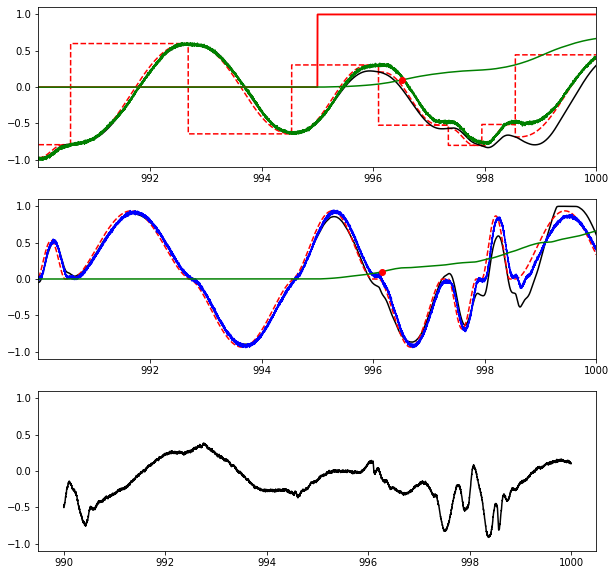

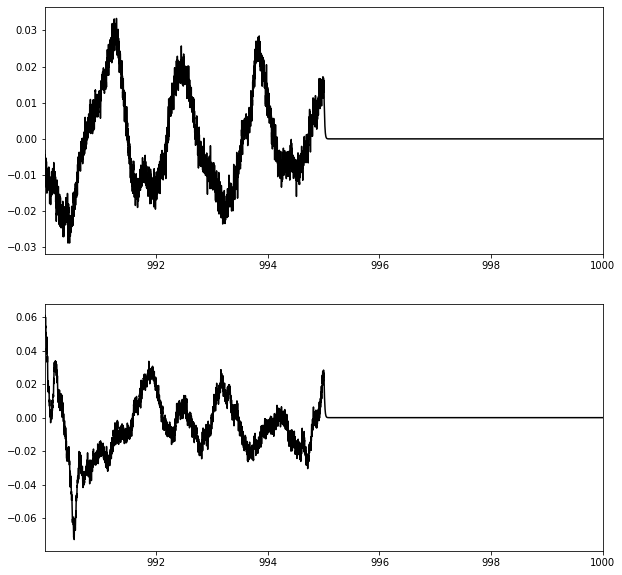

In [ ]:

reload(model_q)
params = model_q.Get_Params()
params.debug = False



params.theta_s = 0.25
params.qs = 5
params.theta_u = 0.25
params.qu = 5
params.recurr = True
params.GTC = False


params.tf = 1000
params.no_obs_from = params.tf -5
probes_nengo = model_q.Nengo_sim(params, tf = params.tf)


In [ ]:
params.theta_s

0.01

Scaling
ind_O:  995000
cerr_hit_pos:  2294
cerr_hit_vel:  2229


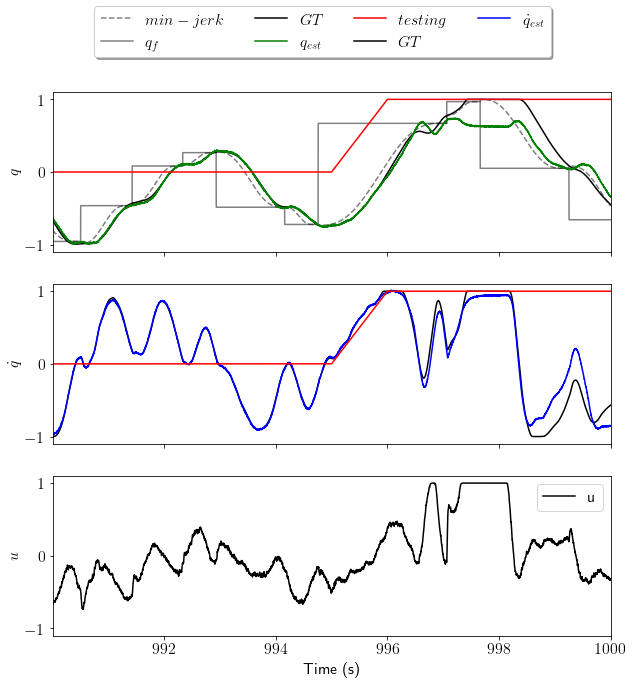

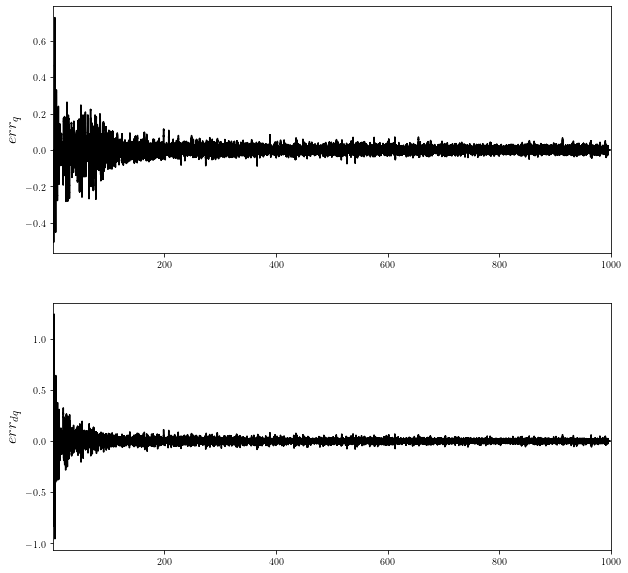

In [ ]:
reload(model_q)
model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True, False)
# save_model(params, probes_nengo)

In [ ]:

reload(model_q)
params = model_q.Get_Params()
params.debug = False



params.theta_s = 0.1
params.qs = 5
params.theta_u = 0.1
params.qu = 5
params.recurr = True
params.GTC = False



params.tf = 500
params.no_obs_from = params.tf -5
probes_nengo = model_q.Nengo_sim(params, tf = params.tf)
save_model(params, probes_nengo)

Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Theta_s: 0.1 Qs: 5
0
Recurrent
1
Recurrent
Theta_u: 0.1 Qu: 5
U into adapt, 0
Estimated control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Saved as pend_tf500_s0.1_qs5_u0.1_qu5_recurrTrue_GTCFalse_n1500


In [ ]:
params.recurr = False

params.GTC = True
probes_nengo = model_q.Nengo_sim(params, tf = params.tf)
save_model(params, probes_nengo)

### Estimate control

In [ ]:
reload(model_q)
params.GTC = False

params.theta_s = 0.25
params.qs = 5
params.theta_u = 0.25
params.qu = 5
params.recurr = True


params.tf = 1000
params.no_obs_from = params.tf -5
probes_nengo = model_q.Nengo_sim(params, tf = params.tf)

Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Theta_s: 0.25 Qs: 5
0
Recurrent
1
Recurrent
Theta_u: 0.25 Qu: 5
U into adapt, 0
Estimated control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over


Scaling
ind_O:  995000
cerr_hit_pos:  1328
cerr_hit_vel:  1218


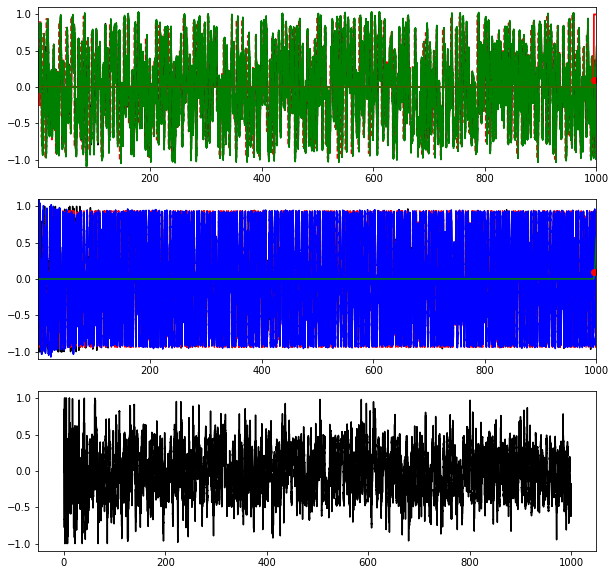

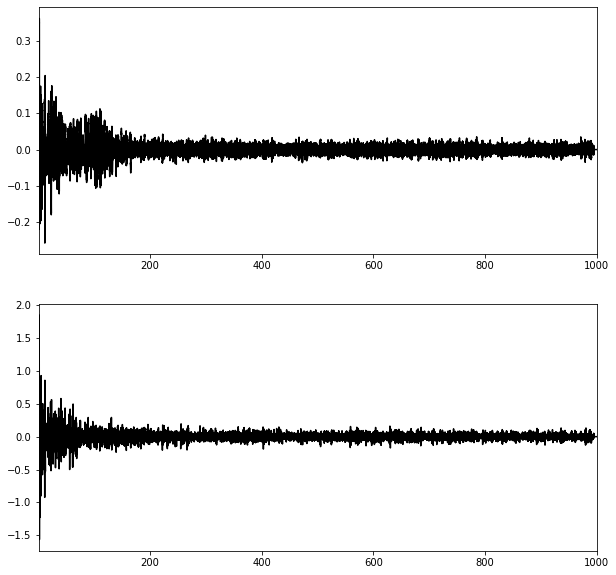

In [ ]:
model_q.plot_states_nengo(params, probes_nengo, 0, -1, True, True)

Scaling
ind_O:  995000
cerr_hit_pos:  2190
cerr_hit_vel:  800


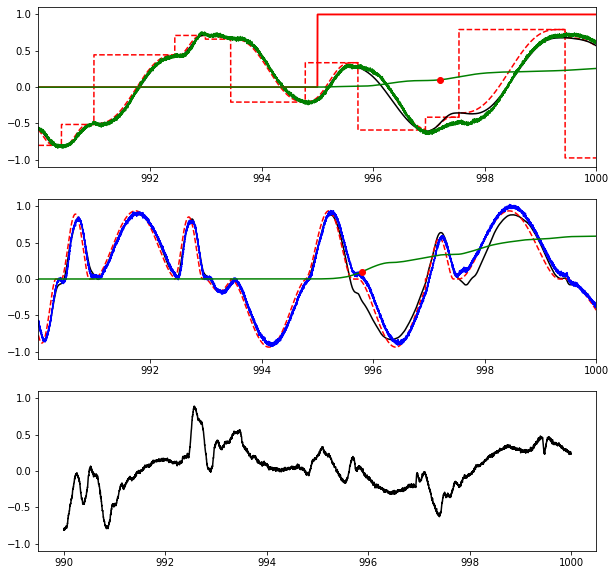

In [ ]:
model_q.plot_states_nengo(params, probes_nengo, -10, -1, True, True)

In [ ]:
save_model(params, probes_nengo)

Saved as pend_tf1000_s0.25_qs5_u0.25_qu5_recurrFalse_GTCFalse_n1500


In [ ]:
reload(model_q)

<module 'model_q' from 'c:\\Users\\Nat\\Documents\\Code\\Thesis\\pend\\model_q.py'>

Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Theta_s: 0.3 Qs: 5
0
1
Theta_u: 0.3 Qu: 5
U into adapt, 0
Ground truth control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Scaling
ind_O:  495000
cerr_hit_pos:  2549
cerr_hit_vel:  1677
Saved as pend_tf500_s0.3_qs5_u0.3_qu5_recurrFalse_GTCTrue_n1500


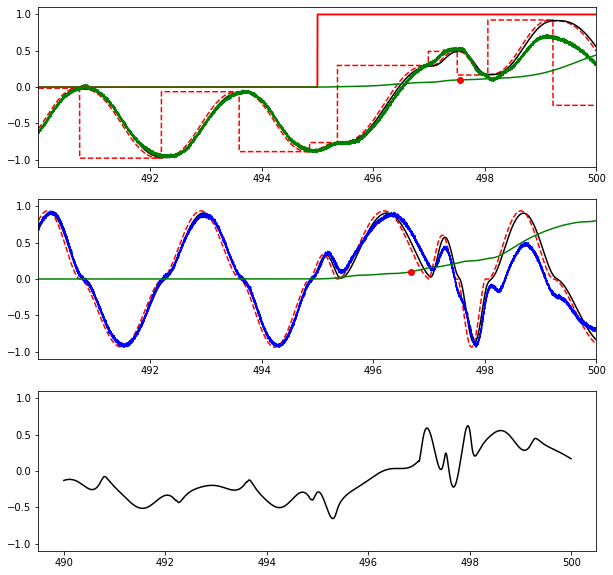

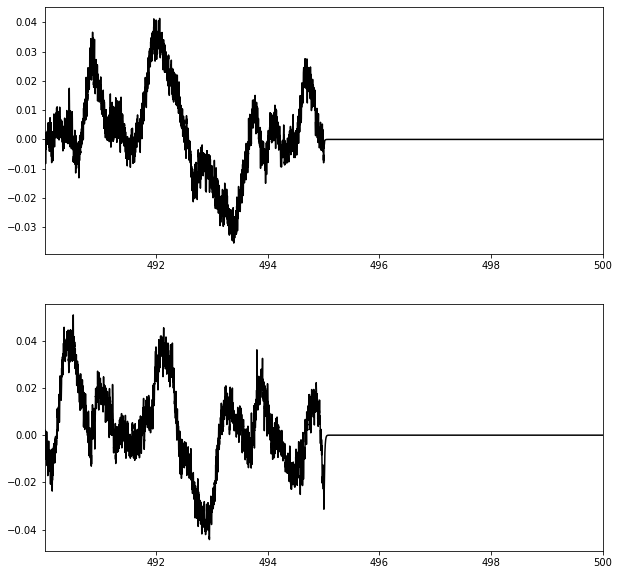

In [ ]:

reload(model_q)
params = model_q.Get_Params()
params.debug = False



params.theta_s = 0.3
params.qs = 5
params.theta_u = 0.3
params.qu = 5
params.recurr = False
params.GTC = True



params.tf = 500
params.no_obs_from = params.tf -5
probes_nengo = model_q.Nengo_sim(params, tf = params.tf)
model_q.plot_states_nengo(params, probes_nengo, -10, -1, True, True)
save_model(params, probes_nengo)

### 5 Sim

In [132]:
import dill as pickle

seed_list = [45, 46, 47, 48, 49]

for i in range(len(seed_list)):
    params.seed = seed_list[i]
    print(f"iteration {i}")
    reload(model_q)
    params.GTC = True
    params.reach_slow = True

    # Params for estimation
    params.Zdim = 2
    params.Udim = 1

    params.theta_s = 0.01
    params.qs = 4
    params.theta_u = 0.01
    params.qu = 4

    params.recurr = False
    params.debug = True
    params.Lr = 1e-4

    params.n_neurons = 1000
    params.Xw = [np.zeros((1, params.n_neurons)), np.zeros((1, params.n_neurons))]


    tf = 1000 + 5
    params.tf = tf
    params.no_obs_from = tf - 5
    probes_nengo = model_q.Nengo_sim(params, tf = tf)


    # Save probes
    save_model(params, probes_nengo, tag = f"_SINDY_seed_{params.seed}")



iteration 0
Pendulum parameters: 
 m =  1.0 
 l =  1.0 
 g =  10.0 
 b =  1.0 

Initial conditions: 
 q = 1.5362749782557716 
 dq = 0.19817890737890176
Time : 0.0
Theta_s: 0.01 Qs: 4
Ctrl,  0
Ground truth control


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 25.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 50.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 75.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 100.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 125.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 150.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 175.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 200.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 225.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 250.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 275.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 300.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 325.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 350.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 375.0
Hit


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 25.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 50.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 75.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 100.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 125.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 150.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 175.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 200.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 225.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 250.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 275.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 300.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 325.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 350.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 375.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 25.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 50.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 75.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 100.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 125.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 150.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 175.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 200.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 225.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 250.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 275.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 300.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 325.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 350.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 375.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 25.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 50.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 75.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 100.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 125.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 150.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 175.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 200.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 225.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 250.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 275.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 300.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 325.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 350.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 375.0
Hit


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

First wait over
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 25.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 50.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 75.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 100.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 125.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 150.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 175.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 200.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 225.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 250.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 275.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 300.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 325.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 350.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Time : 375.0
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit
Hit


In [ ]:

# 
# save_model(params, probes_nengo, tag = f"iteration{i}")

Saved as pend_tf1005_s0.01_qs4_u0.01_qu4_recurrFalse_GTCFalse_n1000_iteration0


In [156]:
# Load the filter
params, probes_nengo = load_model("data_saves\pend_tf1005_s0.01_qs4_u0.01_qu4_recurrFalse_GTCFalse_n1000_iter3.pkl")


Scaling
ind_O:  1000000
cerr_hit_pos:  2093
cerr_hit_vel:  2183


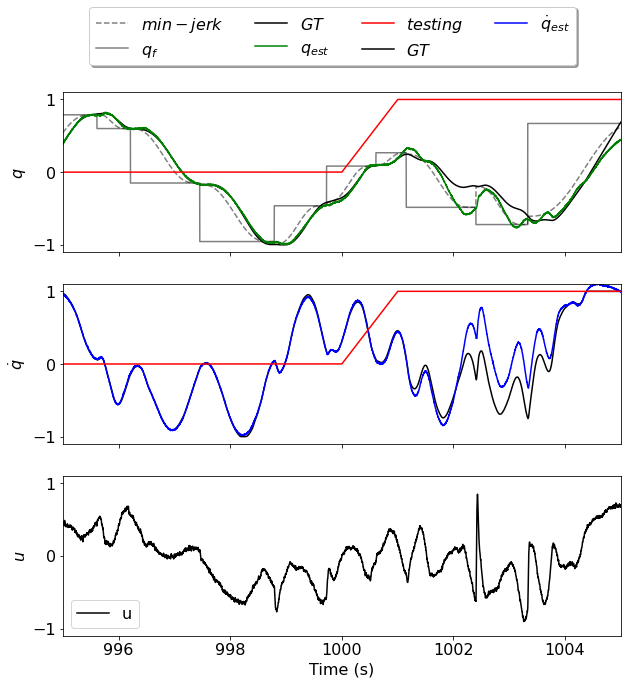

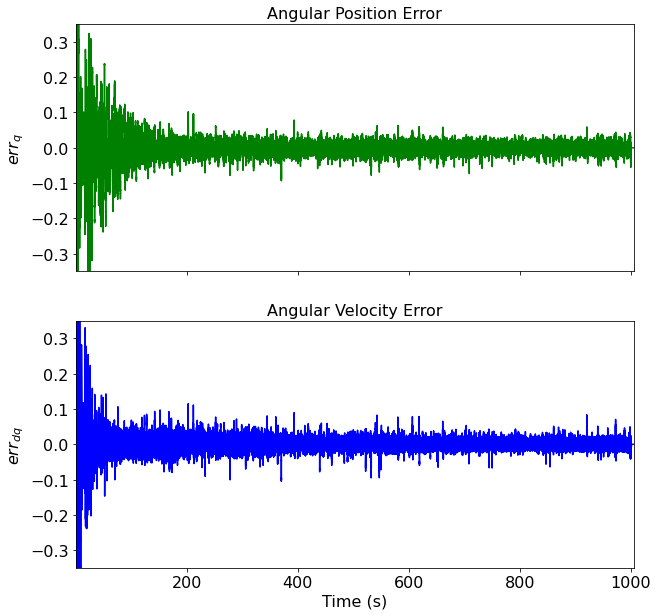

In [162]:
reload(model_q)
ind0 = -10
indf = -1
model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True)

20000
(2500, 3) (20000, 1)
(x0)' = -13.461 1 + 0.490 u0 + -9.545 x0^2 + 0.451 x0 x1 + -2.172 x0 u0 + 9.020 x1^2 + -0.271 x1 u0 + 8.880 u0^2 + 0.162 sin(1 x0) + -22.030 cos(1 x0) + 0.714 sin(1 x1) + 19.263 cos(1 x1) + -0.559 sin(1 u0) + 16.234 cos(1 u0)
(x1)' = 1.732 1 + 6.551 x0 + -5.447 x1 + 4.160 u0 + -4.306 x0^2 + -0.229 x0 u0 + 0.563 x1^2 + 3.089 u0^2 + -10.488 sin(1 x0) + -9.022 cos(1 x0) + 5.191 sin(1 x1) + 1.203 cos(1 x1) + 0.847 sin(1 u0) + 6.084 cos(1 u0)
Initial condition: [[-0.01596883  0.93099385]] 

Pos: SINDy: 771, NAF: 403 
 Vel: SINDy: 582, NAF: 604


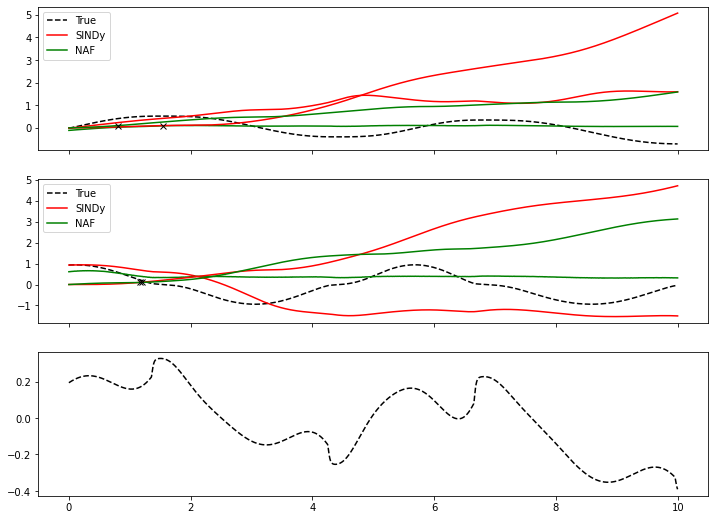

In [131]:
import pysindy as ps
import matplotlib.pyplot as plt


# params, probes_nengo = load_model("data_saves\probes_nengo_GTC_45.pkl")
time, Q, U, Targ, Minj, Z, Xest, E, C, NO = probes_nengo
# time, Z, U, Targ, Minj = probes_num
# no_obs = 95000 #
no_obs = int(params.no_obs_from/params.dt)
print(no_obs)
train_data = Z[:no_obs]
test_data = Z[no_obs:]
test_zest = Xest[no_obs:]

u_train = U[:no_obs]
u_test = U[no_obs:]

print(x_train.shape, u_train.shape)


def give_sindy_metric(train_data, test_data, u_train, u_test, test_est, to_plot = False):
    poly_library = ps.PolynomialLibrary()
    fourier_library = ps.FourierLibrary()
    combined_library = poly_library + fourier_library
    model3 = ps.SINDy(
        feature_library=combined_library,
        # feature_names=feature_names
        )
    model3.fit(train_data, u=u_train, t=dt)
    model3.print()

    x_i = test_data[0].reshape(1,2)
    time_data = np.arange(0, test_data.shape[0]*dt, dt)

    print(f"Initial condition: {x_i} \n")
    N = test_data.shape[0]
    x_sindy = np.zeros((N, 2))

    for i in range(N):
        x_dot_out = model3.predict(x_i, u=u_test[i])
        x_i = x_i + x_dot_out*1e-3
        x_sindy[i] = x_i

    # Metrics 
    cum_err_pos_sindy = np.cumsum(np.abs(x_sindy[:,0] - test_data[:,0]))*1e-3
    cum_err_vel_sindy = np.cumsum(np.abs(x_sindy[:,1] - test_data[:,1]))*1e-3
    cum_err_pos_naf = np.cumsum(np.abs(test_est[:,0] - test_data[:,0]))*1e-3
    cum_err_vel_naf = np.cumsum(np.abs(test_est[:,1] - test_data[:,1]))*1e-3

    cerr_hit_pos_sindy = np.where(cum_err_pos_sindy > 0.1)[0][0]
    cerr_hit_vel_sindy = np.where(cum_err_vel_sindy > 0.1)[0][0]
    cerr_hit_pos_naf = np.where(cum_err_pos_naf > 0.1)[0][0]
    cerr_hit_vel_naf = np.where(cum_err_vel_naf > 0.1)[0][0]

    metric = f"Pos: SINDy: {cerr_hit_pos_sindy}, NAF: {cerr_hit_pos_naf} \n Vel: SINDy: {cerr_hit_vel_sindy}, NAF: {cerr_hit_vel_naf}"

    if to_plot:
        # Plot the results
        fig, ax = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
        for i in range(2):
            ax[i].plot(time_data, test_data[:, i], 'k--', label="True")
            ax[i].plot(time_data, x_sindy[:, i], 'r',label="SINDy")
            ax[i].plot(time_data, test_est[:, i], 'g',label="NAF")
            ax[i].legend()
        ax[2].plot(time_data, u_test, 'k--', label="True")

        ax[0].plot(time_data, cum_err_pos_sindy, 'r',label="SINDy")
        ax[0].plot(time_data, cum_err_pos_naf, 'g',label="NAF")

        ax[1].plot(time_data, cum_err_vel_sindy, 'r',label="SINDy")
        ax[1].plot(time_data, cum_err_vel_naf, 'g',label="NAF")


        # Plot 'kx' where cumerr hits 0.1 for both pos and vel
        ax[0].plot(time_data[cerr_hit_pos_sindy], 0.1, 'kx')
        ax[1].plot(time_data[cerr_hit_vel_sindy], 0.1, 'kx')
        ax[0].plot(time_data[cerr_hit_pos_naf], 0.1, 'kx')
        ax[1].plot(time_data[cerr_hit_vel_naf], 0.1, 'kx')
    return metric, [cerr_hit_pos_sindy, cerr_hit_vel_sindy, cerr_hit_pos_naf, cerr_hit_vel_naf]


metric_str, metric_list = give_sindy_metric(train_data, test_data, u_train, u_test, test_zest, to_plot = True)

print(metric_str)

# ddq = (u - self.b * self.dq* np.abs(self.dq) - self.m*self.g*self.l*np.sin(self.q) )/self.J


In [163]:

ind0 = -10
indf = -1

Metric_iter = []
seed_list = [45, 46, 47, 48, 49]

for i, this_seed in enumerate(seed_list):
    params, probes_nengo = load_model(f"data_saves\pend_tf1005_s0.01_qs4_u0.01_qu4_recurrFalse_GTCTrue_n1000__SINDY_seed_{this_seed}.pkl")
    # model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True)
    time, Q, U, Targ, Minj, Z, Xest, E, C, NO = probes_nengo
    no_obs = int(params.no_obs_from/params.dt)
    print(no_obs)
    
    train_data = Z[:no_obs]
    test_data = Z[no_obs:]
    test_zest = Xest[no_obs:]

    u_train = U[:no_obs]
    u_test = U[no_obs:]
    metric_str, metric_list = give_sindy_metric(train_data, test_data, u_train, u_test, test_zest, to_plot = False)

    print(metric_str)
    Metric_iter.append(metric_list)

1000000
(x0)' = -0.586 1 + 0.637 x1 + 0.280 u0^2 + 0.588 cos(1 u0)
(x1)' = 5.073 x0 + -5.025 x1 + 5.004 u0 + -8.981 sin(1 x0) + 4.732 sin(1 x1)
Initial condition: [[-0.65992259  0.84871187]] 

Pos: SINDy: 610, NAF: 1517 
 Vel: SINDy: 669, NAF: 1264
1000000
(x0)' = -0.313 1 + 0.637 x1 + 0.149 u0^2 + 0.314 cos(1 u0)
(x1)' = 5.058 x0 + -5.027 x1 + 4.906 u0 + -8.966 sin(1 x0) + 4.734 sin(1 x1) + 0.103 sin(1 u0)
Initial condition: [[-0.02411048 -0.03012715]] 

Pos: SINDy: 811, NAF: 2168 
 Vel: SINDy: 606, NAF: 2317
1000000
(x0)' = 0.386 1 + 0.636 x1 + -0.183 u0^2 + -0.387 cos(1 u0)
(x1)' = 26.085 1 + 5.102 x0 + -5.178 x1 + 3.045 u0 + 0.186 x0^2 + 0.479 x0 u0 + -1.841 x1^2 + -11.480 u0^2 + -9.019 sin(1 x0) + 0.765 cos(1 x0) + 4.897 sin(1 x1) + -3.931 cos(1 x1) + 2.025 sin(1 u0) + -22.922 cos(1 u0)
Initial condition: [[-0.01661782 -0.62399712]] 

Pos: SINDy: 611, NAF: 1963 
 Vel: SINDy: 655, NAF: 1653
1000000
(x0)' = 0.636 x1
(x1)' = 45.953 1 + 5.042 x0 + -5.270 x1 + 1.519 u0 + 0.642 x0^2 + 0

[ 879.   586.4 1887.8 1695. ]
[270.70500549  81.23693741 216.38059063 353.39213347]


[Text(0, 0, 'Pos SINDy'),
 Text(1, 0, 'Vel SINDy'),
 Text(2, 0, 'Pos NAF'),
 Text(3, 0, 'Vel NAF')]

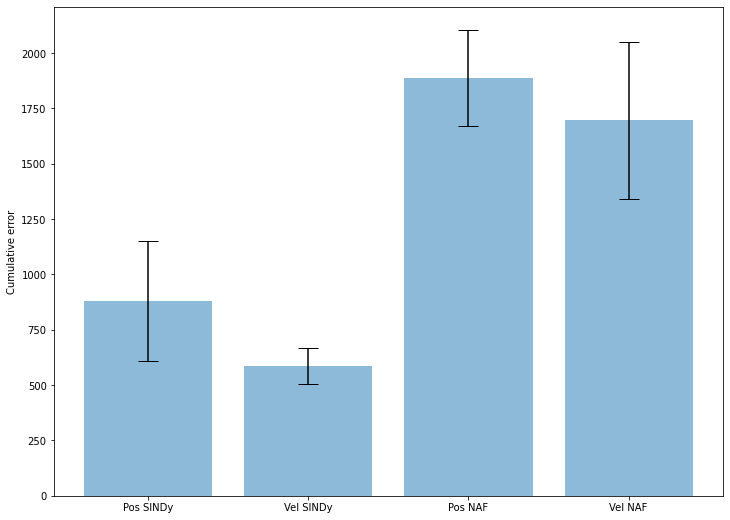

In [165]:
# Make bar plot of metrics (Mean and std as error bars)
Metric_iter = np.array(Metric_iter)

# Mean and std
Metric_mean = np.mean(Metric_iter, axis = 0); print(Metric_mean)
Metric_std = np.std(Metric_iter, axis = 0); print(Metric_std)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), sharex=True)
ax.bar(np.arange(4), Metric_mean, yerr=Metric_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Cumulative error')
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['Pos SINDy', 'Vel SINDy', 'Pos NAF', 'Vel NAF'])



1000000
(x0)' = -0.110 x0 + 0.636 x1 + 0.117 sin(1 x0)
(x1)' = 6.253 1 + 4.738 x0 + -6.522 x1 + -4.199 u0 + 0.674 x1^2 + -3.767 u0^2 + -8.565 sin(1 x0) + 6.373 sin(1 x1) + 1.412 cos(1 x1) + 9.413 sin(1 u0) + -7.667 cos(1 u0)
Initial condition: [[-0.87695441 -0.85362625]] 

Pos: SINDy: 820, NAF: 1290 
 Vel: SINDy: 330, NAF: 1828
1000000
(x0)' = -0.127 x0 + 0.636 x1 + 0.136 sin(1 x0)
(x1)' = 4.282 1 + 4.881 x0 + -6.266 x1 + 0.220 u0 + 0.366 x0 u0 + 0.359 x1^2 + -2.777 u0^2 + -8.702 sin(1 x0) + 0.240 cos(1 x0) + 6.092 sin(1 x1) + 0.720 cos(1 x1) + 4.807 sin(1 u0) + -5.240 cos(1 u0)
Initial condition: [[-0.74173967  0.66850894]] 

Pos: SINDy: 612, NAF: 2450 
 Vel: SINDy: 926, NAF: 2308
1000000
(x0)' = 0.636 x1
(x1)' = 20.470 1 + 4.841 x0 + -6.054 x1 + -0.687 u0 + 0.122 x0^2 + 0.522 x0 u0 + -0.772 x1^2 + -9.789 u0^2 + -8.691 sin(1 x0) + 0.638 cos(1 x0) + 5.860 sin(1 x1) + -1.675 cos(1 x1) + 5.805 sin(1 u0) + -19.433 cos(1 u0)
Initial condition: [[-0.69905657 -0.77667881]] 

Pos: SINDy: 1017

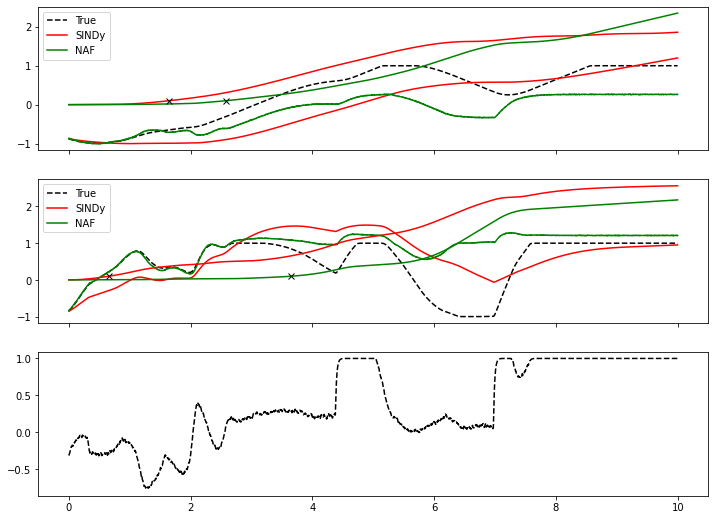

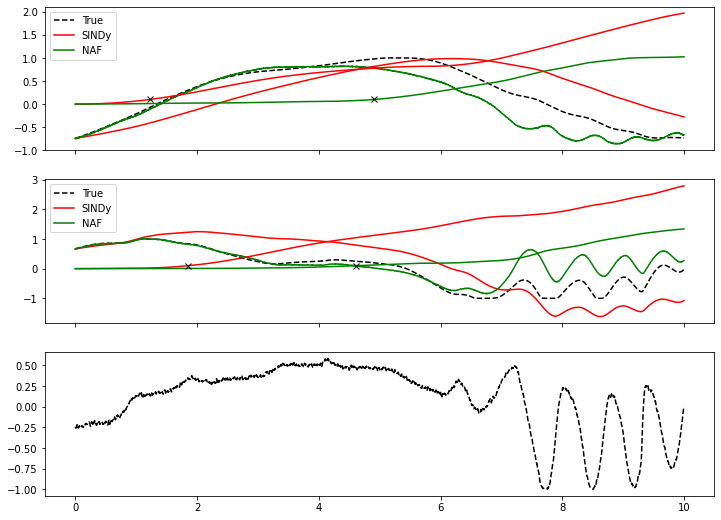

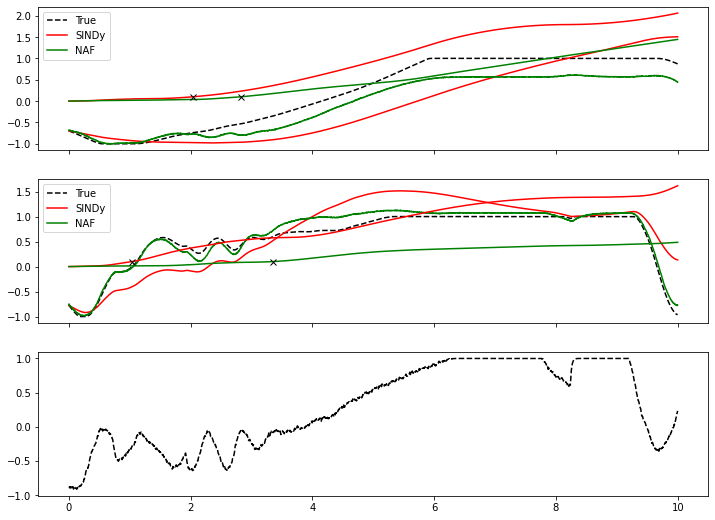

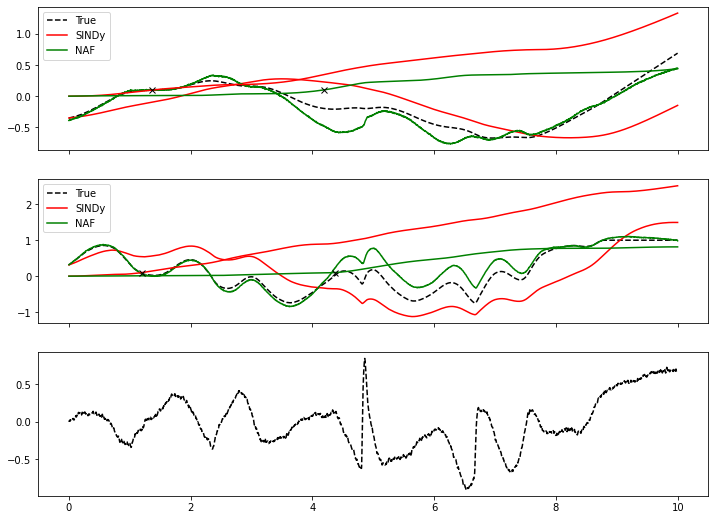

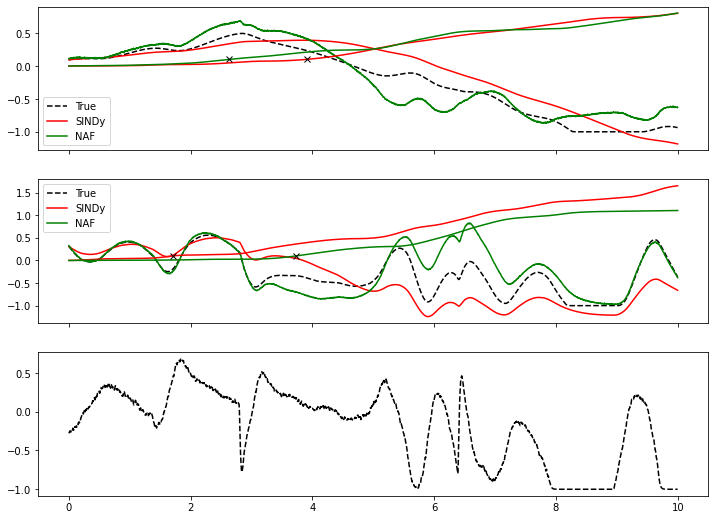

In [143]:

ind0 = -10
indf = -1

Metric_iter = []
iter_list = [0, 1, 2, 3, 4]

for i, this_seed in enumerate(seed_list):
    params, probes_est = load_model(f"data_saves\pend_tf1005_s0.01_qs4_u0.01_qu4_recurrFalse_GTCFalse_n1000_iter{iter_list[i]}.pkl")
    # model_q.plot_states_nengo(params, probes_nengo, ind0, indf, True)
    time, Q, U, Targ, Minj, Z, Xest, E, C, NO = probes_est
    no_obs = int(params.no_obs_from/params.dt)
    print(no_obs)
    
    train_data = Z[:no_obs]
    test_data = Z[no_obs:]
    test_zest = Xest[no_obs:]

    u_train = U[:no_obs]
    u_test = U[no_obs:]
    metric_str, metric_list = give_sindy_metric(train_data, test_data, u_train, u_test, test_zest, to_plot = True)

    print(metric_str)
    Metric_iter.append(metric_list)

[1017.2  646.6 1713.2 1972.4]
[487.2951467  219.74676334 471.45027309 235.12260631]


[Text(0, 0, 'Pos SINDy'),
 Text(1, 0, 'Vel SINDy'),
 Text(2, 0, 'Pos NAF'),
 Text(3, 0, 'Vel NAF')]

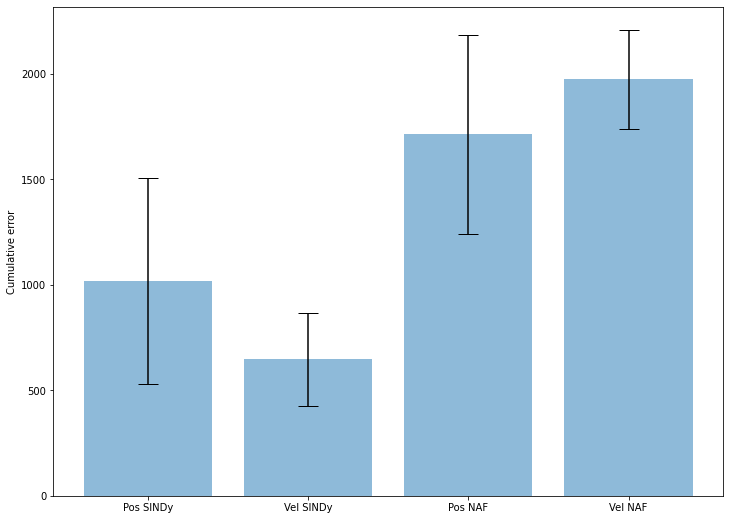

In [158]:
# Make bar plot of metrics (Mean and std as error bars)
Metric_iter = np.array(Metric_iter)

# Mean and std
Metric_mean = np.mean(Metric_iter, axis = 0); print(Metric_mean)
Metric_std = np.std(Metric_iter, axis = 0); print(Metric_std)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), sharex=True)
ax.bar(np.arange(4), Metric_mean, yerr=Metric_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Cumulative error')
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['Pos SINDy', 'Vel SINDy', 'Pos NAF', 'Vel NAF'])

